# best_autodiff

## Introduction

Our package **best_autodiff** implements the forward and reverse modes of Automatic Differentiation (AD), solving the problem on how to estimate a function’s derivatives. While symbolic or numerical differentiation might be costly and produces unstable results, AD is both accurate to machine precision and computationally efficient. By breaking down the original function into a sequence of basic operations and applying the chain rule, AD accomplishes to outperform other classic techniques such as symbolic and numerical differentiation. Its relevance stems from the fact that derivatives are a fundamental calculus tool, widely used in a broad range of fields in science and engineering, and placed at the core of machine learning applications. For example, in deep learning, training and testing a neural network involves calculating a large quantity of gradients tens of thousands of times. For efficiency and accuracy, the forward and backpropagation methods for training/testing a neural network can make use of the forward and reverse modes of AD. 

## Background

### Introduction
*Automatic Differentiation (AD)* is a method for calculating the derivative of a function $f(x)$ specified by a computer program. Any function can be broken down into a sequence of elementary operations, where each operation results in an intermediate value $v_i$ with i being the $i^{th}$ operation. We can represent this with a graph where each intermediate value corresponds to node.  An example of such a graph, called a *computational (forward) graph*, is given below:

**Example** <br>
Computational forward graph for $f(x) = sin(4x)$
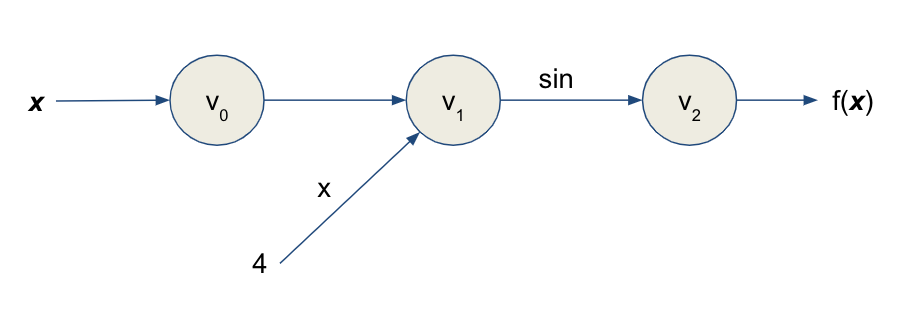

We can then repeatedly apply the *chain rule* to each elementary operation to compute derivatives. 

An example of the chain rule for a simple function is given below:
<br>

**Example** <br>
$\frac{dy}{dx}f(x) = \sin(4x)$
- $\frac{dy}{dx}f(x) = \frac{dy}{du}\sin(4x) * \frac{du}{dx}4x$
- $\frac{dy}{dx}f(x) = cos(4x)4$
<br>

Our package implements the forward and reverse modes of AD. This includes the implementation of dual numbers and the computational graph.

### Forward Mode
During forward mode, we simultaneously compute the *primal trace* (value) and *tangent trace* (derivatives) of a function. For the primal trace, we evaluate each intermediate value. During the tangent trace we take the intermediate values's derivatives with respect to a specific direction. We can define the *directional gradient* as $D_py_i = \sum_{j = 1}^{m}\frac{dy_i}{dx_j}p_j$. This is the projection of the gradient in the direction of the seed vector $p$. Once we choose our direction $p$, we calculate $D_pv_i$ for each intermediate $v_i$ (note: the $y_i$ in the $D_py_i$ definition correspond to our $v_i$).

**Example:**
AD for $f(x) = sin(4x)$ at $x = \frac{\pi}{4}$ <br>

First we need to choose a $p$. In this example our input is 1D, therefore, p = 1 is the logical choice for our direction. Thus we get $D_py_i = \frac{dy_i}{dx_i}$ where $y_i$ are the intermediate variables $v_i$. Next, we compute the *forward primal trace* and the *forward tangent trace* simultaneously.


|Primal Trace|Tangent Trace| Numerical Value of $v_i$; $D_pv_i$| 
|:---|:---|:---|
|$v_0 = \frac{\pi}{4}$|$D_pv_0 = 1$         |0.78539816339 ; 1  |          
|$v_1 = 4v_0$         |$D_pv_1 = 4D_pv_0$   |3.14159265359 ; 4 |          
|$v_2 = f(x) = sin(v_1)$|$D_pv_2 = cos(v_1)D_pv_1$|0 ; -4 |                        

The value of the tangent trace given in the last row is the derivative that we are looking for: $D_pv_2 = \frac{df}{dx}f(x)$ where x = $\frac{\pi}{4}$. Looking at how we compute the *forward tangent trace*, you can see the use of the chain rule.

Next, let's consider the higher dimensional case where our $f(x)$ is a vector function i.e. $f(x)$ maps inputs in the dimension $R^m$ to $R^n$. The gradient of a such a function is the Jacobian. Let's look at an example where m = 2 and n = 2. There are 2 possible directions: $p_1 = [1,0]^T$ and $p_2 = [0,1]^T$. If we take the direction gradient with the first direction $p_1$ we get the first column of the Jacobian and if we use $p_2$ we get the second column of the Jacobian. Therefore we can compute the Jacobian using m passes where each direction vector $p_i$ are set to the $m^{th}$ unit vector along $x_m$ in the $m^{th}$ pass. 

In summary, forward mode AD works by: 
1. Breaking down a function into a sequence of elementary operations/functions
2. From the inside out, simultaneously compute:
    - The forward primal trace: evaluting our intermediate values.
    - The forward tangent trace: computing the derivatives of our intermediate values in a specified direction using the chain rule.

### Dual Numbers
In forward mode, we evaluate our intermediate values $v_j$ and their directional gradients $D_pv_j$ at the same time. We want to carry these two values together as a pair. We can do this using *dual numbers*. A dual number is a number $z = a + bϵ$ where $a$ corresponds to the "real part" and $b$ corresponds to the "dual part". $a$ and $b$ are real numbers while $ϵ$ has the property $ϵ^2=0$ and is not a real number. We can substitute our function as the real part and the derivative of the function as the dual part. There are two key observations:
1. Adding such dual numbers is adding the real parts and adding the derivatives in the dual part
2. Multiplying such dual numbers is multiplying the real parts and applying the product rule for the derivatives in the dual part
3. The chain rule applies to dual numbers
In the forward mode setting, we set the real parts of our dual numbers as the intermediate values $v_j$ and dual parts as $D_pv_j$.

### Reverse Mode
Unlike forward mode, reverse mode uses a two-pass process:

1. In the first pass (forward), we compute the primal trace $v_j$ and compute the partial derivatives $\frac{dv_j}{dv_i}$ where $v_i$ is the parent node (in the computational graph) of $v_j$.

2. In the second pass (reverse), we traverse the computational graph backwards and compute the partial derivative of the $i^{th}$ output $f_i$ with respect to the intermediate values (also called the *adjoint* of the intermediate value). We use this to compute $\sum_{j = child(i)}\frac{df}{dv_j}\frac{dvj}{dvi}$ where the first term in the summation is the adjoint of $v_j$.

The properties of dual numbers do not work for reverse mode. Therefore, we can create a computational graph data structure along with function overloading to implement reverse mode.

## How to Use

### PyPI Installation
Users can install best_autodiff from [Test Python Package Index](https://test.pypi.org/) (PyPI) following the steps given below:
1. Create a virtual environment where best_autodiff will run (recommended) `python3 -m venv /path/to/new/virtual/environment`
2. Activate virtual environment `source /path/to/new/virtual/environment/bin/activate`
3. `pip install --index-url https://test.pypi.org/simple/ --extra-index-url https://pypi.org/simple best-autodiff`

Note to developers: unit tests are included in the source distribution at <a href="https://test-files.pythonhosted.org/packages/94/2d/5f6176f07cba032475fea44a1674993fdc0d7636f71e350b9e88bdd8b94b/best_autodiff-0.0.4.tar.gz"> test PyPI </a>, however they won't be installed automatically in the site-packages directory via pip, following best practices to avoid pollution for regular users.

### GitHub Installation
Users can also install the package using GitHub by following the steps given below:
1. Go to the objective directory where you want to install best_autodiff.

2. Clone the repository. Using the command line you can type `git clone https://code.harvard.edu/CS107/team02.git`

3. Then position yourself into the project root using `cd team02`

4. Create a virtual environment where best_autodiff will run (recommended) `python3 -m venv /path/to/new/virtual/environment`

5. Activate virtual environment `source /path/to/new/virtual/environment/bin/activate`

6. Install `pip install -r requirements.txt`

7. Ready to go!

###  Forward Mode Demo
Our forward mode can be run on the following cases:
1. $R → R$ (scalars, 1 function with 1 input)
2. $R → R^n$ (vector, multiple functions with 1 input)
3. $R^m → R$ (vector, 1 function with multiple inputs)
4. $R^m → R^n$ (vectors, multiple functions/outputs with 1 or multiple inputs)

When defining vector functions (functions that take in multiple inputs) there are 2 possible ways to do so:
```python
def f(x):
    """
    first way
    """
    return x[0] + x[1]

def f(x, y):
    """
    second way
    """
    return x + y
```
Our forward (and reverse) mode only supports the first way to define functions with multiple inputs. If the user wants to use a function defined the second way they can wrap their function in the following way:

```python
def f(x, y):
        return x + y

def h(v):
    """
    wrapper
    """
    return f(*v)

forward = ad.Forward(h, 2, 1)
x = np.array([1, 2])
value,jacobian = forward(x)
```
This means scalar case functions (1 function, 1 input) should be implemented as follows:
```python
#without wrapper
def f(x):
  return x[0]

forward = ad.Forward(f, 1, 1)
value,jacobian = forward(1)

#with wrapper
def f_need_to_wrap(x):
  return x

def h(v):
  return f_need_to_wrap(*v)

forward = ad.Forward(h, 1, 1)
value,jacobian = forward(1)

````
Examples of how to use our package's forward mode is shown below.
<br>

```python
# import packages
import numpy as np
import best_autodiff as ad

## Example 1: scalar case (1 function, 1 input)
def f(x):
    return ad.sin(x[0])
#instantiate forward mode object for function f that has 1 input and 1 output(function)
forward = ad.Forward(f,1,1)
#get value and jacobian of function at x = 0
value, jacobian = forward(0)


## Example 2: vector case (1 function, muliple inputs)
def f(x):
    return x[0]*x[1]
#instantiate forward mode object for function f with multiple inputs
forward = ad.Forward(f,2,1)
#get value and jacobian at x = [4,5]
value, jacobian = forward(np.array([4,5]))
#can also get partial derivatives with seed vectors
partial_x0 = forward.get_jacobian(np.array([4,5]), np.array([1,0]))
partial_x1 = forward.get_jacobian(np.array([4,5]), np.array([0,1]))
          

## Example 3: multiple functions (multiple functions, 1 or multiple inputs)
def f1(x):
    return ad.sin(x[0])
def f2(x):
    x[0]**2 + x[1]**2
#instantiate forward mode object for functions [f1,f2] that have multiple inputs x = [x0,x1]
forward = ad.Forward([f1,f2],2,2)
#get function value and jacobian at x = [0,4]
value, jacobian = forward(np.array([0,4]))
#can also get weighted partial derivatives with weighted seed vector
#use same seed vector for each function:
partials_weighted_same = forward.get_jacobian(np.array([0,4]), np.array([2,1/2]))
#use different seed vector for each function
partials_weighted_different = forward.get_jacobian(np.array([0,4]), np.array([[2,1/2],[2,0]]))
```

### Reverse Mode Demo

Our Reverse mode supports the same cases as Forward mode, where the most complex case involves multiple inputs and multiple functions:

1. $R → R$ (scalars, 1 function with 1 input)
2. $R → R^n$ (vector, multiple functions with 1 input)
3. $R^m → R$ (vector, 1 function with multiple inputs)
4. $R^m → R^n$ (vectors, multiple functions/outputs with 1 or multiple inputs)

Examples
```python
import numpy as np
from best_autodiff.graph import Graph
from best_autodiff.rfunctions import *

# R -> R
def f(x):
    return sin(x[0])**3 + sqrt(cos(x[0]))
x = 1
ad = Reverse(f, 1, 1)
ad.evaluate(x) # 1.3308758237356713
ad.get_jacobian(x) # 0.5753328132280636

# R -> Rn
def f0(x):
    return x[0]**3
def f1(x):
    return x[0]
def f2(x):
    return logistic(x[0])

f = [f0, f1, f2]
x = 3
ad = Reverse(f, 1, 3) # 1 input, 3 outputs
ad.evaluate(x)
# array([[27.        ],
#        [ 3.        ],
#        [ 0.95257413]])
ad.get_jacobian(x)
# array([[27.        ],
#        [ 1.        ],
#        [ 0.04517666]])


# Rm -> R
def f(x):
    return (sqrt(x[0])/log(x[1]))*x[0]
x = [5, 6]
ad = Reverse(f, 2, 1) # 2 inputs, 1 output
ad.evaluate(x) # array([6.2398665])
ad.get_jacobian(x) # array([[ 1.87195995, -0.58042263]])

# Rm -> Rn
def f1(x):
    return exp(-(sin(x[0])-cos(x[1]))**2)

def f2(x):
    return sin(-log(x[0])**2+tan(x[2]))
f = [f1, f2]
x = [1, 1, 1]
ad = Reverse(f, 3, 2) # 3 inputs, 2 outputs
ad.evaluate(x)
# array([[0.53082693],
#        [0.59780049]])
ad.get_jacobian(x)
# array([[-2.89414738,  0.35482731,  0.        ],
#        [-0.23044861,  0.        ,  1.23700275]])

```



## Software Organization

### Tree-Structured Directory

best_autodiff will be structured as follows:

```
team02
└─── README.md
└─── LICENSE
└─── requirements.txt 
└─── pyproject.toml
└─── setup.cfg
│
└───best_autodiff
│   └─── __init__.py
│   └─── forward.py
│   └─── dualnumber.py
|   └─── functions.py
|   └─── reverse.py
│   └─── graph.py
│   └─── rfunctions.py
|
└───demo
|   └─── demo.ipynb
│
└───docs
|   └─── documentation.ipynb
│   └─── milestone1.ipynb
|   └─── milestone2_progress.md
|   └─── milestone2.ipynb
│
└───tests
    └─── test_forward.py
    └─── test_dualnumber.py
    └─── test_functions.py
    └─── test_reverse.py
    └─── test_graph.py
    └─── test_runctions.py
    └─── run_tests.sh
    └─── check_coverage.sh
    └─── htmlcov

```

### Modules

Our package plans to implement 6 different modules:
1. ```forward.py``` implements the forward mode of AD.
2. ```reverse.py``` implements the reverse mode of AD.
3. ```dualnumber.py``` implements the dual number data structure to support forward mode. This class has overloaded operations (i.e. addition, subtraction, multiplication, division) 
4. ```functions.py``` implements elementary functions for the dual number data structure, such as sin, cos, tan, exp, log, etc., and is used in forward mode.
5. ```graph.py``` implements the computational graph used in the forward and backward passes of reverse mode. 
6. ```rfunctions.py``` implements elementary functions for the graph data structure, such as sin, cos, tan, exp, log, etc., and is used in reverse mode.

### Test Suite

A test directory is available, containing a collection of modules with test cases for each module in the source code. We provide a test suite for the six modules implemented: ```forward```, ```dualnumber```, ```functions```, ```reverse```, ```graph``` and ```rfunctions```. We release test and coverage reports and we use the ```pytest``` package. A client can run our test suite as follows:

1. cd into our "tests" folder
2. command to run the tests: ./run_tests.sh CI 
3. command to get the test coverage: ./run_tests.sh coverage

### Package Distribution

Our package will be distributed through PyPI with PEP517.

## Implementation

### Classes
Our package implementes the following classes:
Forward mode:
1. Forward
3. DualNumber

Reverse mode:
1. Graph
2. Reverse

Additionally, each mode has a dedicated Functions module to override our implemented functions:
1. functions (forward)
2. rfunctions (reverse)

### Data Structures
We use/implement the following major data structures:
1. DualNumber: used in the forward mode of AD
2. Graph: used to implement the computational graph for reverse mode of AD
3. NumPy Arrays: used to represent our inputs and outputs (i.e. the jacobian)

### Class Methods, Name Attributes, Implementation Details
Our code contains docstrings for all of our methods. Each of them describes briefly what the module does, the classes' attributes and modules, the classes and functions' parameters, main raise errors catched and examples. 

#### Forward
A list of class attributes and methods as well as code is given in the forward mode implementation below:

```python
class Forward:
	""" Class used to implement Forward mode of Automatic Differentiation for the following cases:
	1. Scalar function
	2. Vector function
	3. Multiple functions

	Attributes
	----------

	f: function or list of functions
		Function(s) to evaluate
 
	m: int
		Number of inputs to function

	n: int
		Number of outputs to function


	Methods
	-------
	__init__(self, f, m, n)
		Instantiate forward mode object

	evaluate(self, x)
		Calculate value of functions evaluated at x

	get_jacobian(self, x)
		Calculate Jacobian for function evaluated at x

	Example
	-------
	1. SCALAR CASE 
		1 input and 1 output

		def f(x):
			return x**2

		fw = Forward(f, 1, 1)
		print("value evaluated at 4:", fw.evaluate(4))
		>> value evaluated at 4: 16
		print("Jacobian evaluated at 4:", fw.get_jacobian(4))
		>> Jacobian evaluated at 4: 8

	2. Multiple inputs and 1 output

		def f(x):
			return x[0]**2 + sin(x[1])

		fw = Forward(f, 2, 1)
		print("value evaluated at [5, np.pi/2]:", fw.evaluate(np.array([5, np.pi/2])))
		>> value evaluated at [5, np.pi/2]: 26.0
		print("Jacobian evaluated at [5, 0]:", fw.get_jacobian(np.array([5, 0])))
		>> Jacobian evaluated at [5, 0]: [10.0, 1.0]

	3. 1 input and multiple outputs

		def f1(x):
			return exp(x**2)

		def f2(x):
			return 2*cos(x)

		fw = Forward([f1, f2], 1, 2)
		print("value evaluated at 1:", fw.evaluate(1))
		>> value evaluated at 1: [2.718281828459045, 1.0806046117362795]
		print("Jacobian evaluated at 1:", fw.get_jacobian(1))
		>> Jacobian evaluated at 1: [5.43656365691809, -1.682941969615793]


	4. Multiple inputs and multiple outputs

		def f1(x):
			return x[0] + x[1]

		def f2(x):
			return x[0] * x[1]

		def f3(x):
			return exp(x[0])

		fw = Forward([f1, f2, f3], 2, 3)
		print("value evaluated at [2, 5]:", fw.evaluate(np.array([2, 5])))
		>> value evaluated at [2, 5]: [7, 10, 7.38905609893065]
		print("Jacobian evaluated at [1, 2]:", fw.get_jacobian(np.array([1, 2])))
		>> Jacobian evaluated at [1, 2]: [[1, 1], [2, 1], [2.718281828459045, 0.0]]

	"""

	_supported_scalars = (float, int, np.int64, np.float64, np.int32, np.float32)
	_supported_lists = (list, np.ndarray)

	def __init__(self, f, m, n):
		""" Instantiates forward mode object

		Parameters
		----------
		f: list of functions
			function(s) user wants to evaluate

		m: int
			number of inputs to function(s)

		n: int
			number of outputs of function

		Raises
		------
		TypeError
			If the number of inputs is not an integer or less than 1
			If the number of outputs is not an integer or less than 1
			If there is 1 output and the function is not callable
			If there is more than 1 output and function argument is not a list of callable functions
		"""

		if not isinstance(m, int):
			raise TypeError(f"Unsupported type {type(m)} for number of inputs")

		if not isinstance(n, int):
			raise TypeError(f"Unsupported type {type(m)} for number of outputs")

		if m < 1:
			raise TypeError(f"Number of inputs {m} should be at least 1")

		if n < 1:
			raise TypeError(f"Number of outputs {n} should be at least 1")

		if (n == 1) and (not callable(f)) and (not isinstance(f, self._supported_lists)):
			raise TypeError(f"Unsupported function type {type(f)}")

		if n > 1 and not isinstance(f, self._supported_lists):
			raise TypeError(f"Expected a list of functions")

		if isinstance(f, self._supported_lists):
			for function in f:
				if not callable(function):
					raise TypeError(f"Functions must be callable")

		if isinstance(f, self._supported_lists) and len(f) != n:
			raise TypeError(f"Unsupported number of functions: expected {n} but received {len(f)} elements")

		self.f = []
		self.m = m
		self.n = n

		if callable(f):
			self.f.append(f)
		else:
			for function in f:
				self.f.append(function)

	def _get_value_highd(self, x):
		""" Calculates value for function with multiple outputs evaluated at x
		"""

		# evaluate each function given in instantiation
		values = []
		if self.m == 1:
			for f in self.f:
				values.append(f(DualNumber(x)).real)

		else:
			for f in self.f:
				val = self._get_value(f, x)
				values.append(self._get_value(f, x).squeeze())

		return np.array(values)

	def _get_value(self, f, x):
		""" Calculates value for function with 1 output evaluated at x
		"""

		# if user inputs a scalar, return a scalar
		if self.m == 1 and isinstance(x, self._supported_scalars):
				return f(DualNumber(x)).real

		# otherwise, if user inputs an array, return an array
		elif self.m == 1:
			return np.array([f(DualNumber(x[0])).real])

		# convert each input into a Dual Number to calculate function evaluation
		else:
			inputs = []
			for z in x:
				inputs.append(DualNumber(z, 1))
			return np.array([f(inputs).real])

	def evaluate(self, x):
		""" Evaluate function at given x

		Parameters
		----------
		x: int, float, np.float64, np.int64, np.int32, np.float32 (for scalars) or np.ndarray (for vectors)
			Value(s) to evaluate function at

		Returns
		-------
		value: int or float (if function has 1 output) or np.ndarray (if function has more than 1 output)
			Result of function evaluated at given x

		Raises
		------
		TypeError
			If the function has 1 input and x is not of type int, float, np.float64, np.int32 or np.float32
			If the function has more than 1 input and x is not of type np.ndarray
			If the function has more than 1 input and x is not an array of np.float64, np.int32 or np.float32 elements
			If the function has more than 1 input and x is not an array of the same length as 
				the number of inputs defined in the AD instantiation

		"""

		if (self.m == 1) and (not isinstance(x, self._supported_scalars)) and (not isinstance(x, np.ndarray)):
			raise TypeError(f"Unsupported type {type(x)} for inputs")

		if self.m > 1 and not isinstance(x, np.ndarray):
			raise TypeError(f"Unsupported type {type(x)} for function with {self.m} inputs")

		if isinstance(x, np.ndarray):
			for element in x:
				if not isinstance(element, self._supported_scalars):
					raise TypeError(f"Unsupported type {type(element)} for element {element} inside inputs")

		if isinstance(x, np.ndarray) and len(x) != self.m:
			raise TypeError(f"Unsupported number of inputs: expected {self.m} and received {len(x)}")

		if self.n > 1:
			return self._get_value_highd(x)
		else:
			return self._get_value(self.f[0], x)

	def _get_jacobian_highd(self, x):
		""" Calculates Jacobian for function(s) with multiple outputs evaluated at x
		"""

		jacobian = []

		# calculate each row of the Jacobian: one for each of the functions given
		for f in self.f:
			jacobian.append(self._get_jacobian(f, x))

		return np.array(jacobian)

	def _get_jacobian(self, f, x):
		""" Calculates Jacobian for function(s) with 1 output evaluated at x
		"""

		# if user inputs a scalar, return a scalar
		if self.m == 1 and isinstance(x, self._supported_scalars):
			return f(DualNumber(x,1)).dual

		# otherwise, if user inputs an array, return an array
		elif self.m == 1:
			return np.array([f(DualNumber(x[0])).dual])

		else:
			jacobian = []
			inputs = []
			for z in x:
				inputs.append(DualNumber(z, 1))

			# calculate the partial derivative with respect to each input
			for i, val in enumerate(inputs):
				partial_values = [DualNumber(z.real, 0) for z in inputs]
				partial_values[i] = val
				jacobian.append(f(partial_values).dual)

			return np.array(jacobian)

	def get_jacobian(self, x, seed = None):
		""" Calculates Jacobian for function evaluated at x

		Parameters
		----------
		x: int, float, np.float64, np.int64, np.int32, np.float32 (if function has 1 input) or np.ndarray (if function has more than 1 input)
			Value(s) to evaluate Jacobian at
		
		seed: np.darray corresponding to the directional seed vector

		Returns
		-------
		value: np.ndarray
			Result of Jacobian evaluated at given x

		Raises
		------
		TypeError
			If the function has 1 input and x is not of type int, float, np.int64, np.float64, np.int32, np.float32
			If the function has more than 1 input and x is not of type np.ndarray
			If the function has more than 1 input and x is not an array of np.float64, np.int32 or np.float32 elements
			If the function has more than 1 input and x is not an array of the same length as 
				the number of inputs defined in the AD instantiation
		"""

		if (self.m == 1) and (not isinstance(x, self._supported_scalars)) and (not isinstance(x, np.ndarray)):
			raise TypeError(f"Unsupported type {type(x)} for inputs")

		if self.m > 1 and not isinstance(x, np.ndarray):
			raise TypeError(f"Unsupported type {type(x)} for function with {self.m} inputs")

		if seed is not None:
			if not isinstance(seed, np.ndarray):
				raise TypeError(f"Unsupported type {type(seed)} for seed vector")
			elif self.m != seed.shape[0]:
				raise TypeError(f"Seed of size {seed.shape} doesn't match number of inputs {self.m}")

		if isinstance(x, np.ndarray):
			for element in x:
				if not isinstance(element, self._supported_scalars):
					raise TypeError(f"Unsupported type {type(element)} for element {element} inside inputs")

		if isinstance(x, np.ndarray) and len(x) != self.m:
			raise TypeError(f"Unsupported number of inputs: expected {self.m} and received {len(x)}")

	
		if self.n > 1: #more than one function
			jacobian = self._get_jacobian_highd(x)
		else: # 1 function
			jacobian = self._get_jacobian(self.f[0], x)
		
		if seed is not None: #seed specified
			return np.dot(jacobian,seed)
		else: #return full jacobian
			return jacobian

	def __call__(self, x):
        """
        calls the evaluate and get_jacobian methods from the forward object
        """
		return (self.evaluate(x), self.get_jacobian(x))
```

#### Reverse
Class to evaluate functions at different points and estimate derivatives using a backward pass.


```python
"""
reverse module
Implements Reverse class: a class to perform the reverse mode of automatic differentiation
"""
import numpy as np
from best_autodiff.graph import Graph
from best_autodiff.rfunctions import *
import warnings
warnings.filterwarnings('ignore')

__all__ = ["Reverse"]

class Reverse:
    """
    Class used to implement Reverse mode of Automatic Differentiation

    Attributes
    ----------
    function_list:
        numPy array or list of functions to evaluate

    input_list:
        numPy array or list for the initialization parameters of the functions' inputs
    
    m:
        scalar (int or float) number of inputs
    
    n:
        scalar (int or float) number of functions (outputs)
    
    function_dict:
        Initialized to None.
        Dictionary that will contain the variables and their local derivatives
    
    jacobian_:
        Initialized to array of zeros of size [n,m] once _get_gradients() is called.

    Methods
    -------
    __init__(self, function_list, input_list, m, n):
        instantiates reverse mode object.
        Transforms inputs into Graph class and evaluates function at given points
        Runs private method _get_gradients()
    
    evaluate(self):
        Returns the primal trace
    
    get_jacobian(self):
        Returns the adjoint trace
    
    Examples
    --------
    R -> R
    >>> def f(x):
    >>>    return sin(x[0])**3 + sqrt(cos(x[0]))
    >>> x = 1
    >>> ad = Reverse(f, 1, 1)
    >>> ad.evaluate(x)
    >>> J = ad.get_jacobian(x)
    >>> J
    0.5753328132280636

    Rm -> R
    >>> def f(x):
    >>>     return (sqrt(x[0])/log(x[1]))*x[0]
    >>> x = [5, 6]
    >>> ad = Reverse(f, 2, 1)
    >>> ad.evaluate(x)
    >>> J = ad.get_jacobian(x)
    >>> J
    array([[ 1.87195995, -0.58042263]])

    R -> Rn
    >>> def f0(x):
    >>>     return x[0]**3 
    >>> def f1(x):
    >>>     return x[0]
    >>> def f2(x):
    >>>     return logistic(x[0])
    >>> f = [f0, f1, f2]
    >>> x = 3
    >>> ad = Reverse(f, 1, 3)
    >>> ad.evaluate(x)
    >>> J = ad.get_jacobian(x)
    >>> J
    array([[27.        ],
       [ 1.        ],
       [ 0.04517666]])
    
    Rm -> Rn
    >>> def f1(x):
    >>>     return exp(-(sin(x[0])-cos(x[1]))**2)
    >>> def f2(x):
    >>>     return sin(-log(x[0])**2+tan(x[2]))
    >>> f = [f1, f2]
    >>> x = [1, 1, 1]
    >>> ad = Reverse(f, 3, 2)
    >>> ad.evaluate(x)
    >>> J = ad.get_jacobian(x)
    >>> J
    array([[-0.29722477, -0.46290015,  0.        ],
       [ 0.        ,  0.        ,  0.04586154]])
    """
    _scalars_types = (int, float, np.int32, np.int64, np.float64)
    _array_types = (list, np.ndarray)

    def __init__(self, function_list, m, n):
        """
        Instantiates reverse mode object

        Parameters
        ----------
        function_list:
            numPy array or list of functions to evaluate

        input_list:
            numPy array or list for the initialization parameters of the functions' inputs
        
        m:
            scalar (int or float) number of inputs
        
        n:
            scalar (int or float) number of functions (outputs)
        
        Raises
        -------
        TypeError if function_list is not of type np.ndarray or list
        TypeError if function_list elements are not callable (i.e functions)
        TypeError if input_list is not of type np.ndarray or list
        TypeError if input_list elements are not int, float, array or list

        Examples
        --------
        >>> def f1(x):
        >>>     return exp(-(sin(x[0])-cos(x[1]))**2)
        >>> def f2(x):
        >>>     return sin(-log(x[0])**2+tan(x[2]))
        >>> f = [f1, f2]
        >>> x = [1, 1, 1]
        >>> ad = Reverse(f, 3, 2)
        """
        # Validate function_list content
        if isinstance(function_list, self._array_types):
            if all([callable(f) for f in function_list]):
                self.function_list = np.array(function_list)
            else:
                raise TypeError(f"Unsupported non callable object")
        elif callable(function_list):
            self.function_list = np.array([function_list])
        else:
            raise TypeError(f"Unsupported type {type(function_list)}")

        # Save number of inputs
        if isinstance(m, self._scalars_types):
            self.m = m
        else:
            raise TypeError(f"Unsupported type {type(m)}")
        
        # Save number of outputs
        if isinstance(n, self._scalars_types):
            self.n = n  
        else:
            raise TypeError(f"Unsupported type {type(n)}")

        # Initial dictionary to store local derivatives
        self.function_dict = None


    def _get_gradients(self):
        """ 
        Estimates the local derivatives of `variable` 
        with respect to child variables.
        Each node and path is stored in function_dict
        """
        # Array to store local derivatives (needs to be reset every time)
        self.jacobian_ = np.zeros((self.n,self.m))

        function_dict = {}

        for f_value in self.function_list_:
            gradients = dict()
            
            def compute_gradients(variable, path_value):
                for child_variable, local_gradient in variable.local_gradients:
                    # Multiply the edges of a path
                    value_of_path_to_child = path_value * local_gradient
                    # Add together the different paths
                    gradients[child_variable] = gradients.get(child_variable, np.array([0]*len(value_of_path_to_child))) + np.array(value_of_path_to_child)
                    # recurse through graph
                    compute_gradients(child_variable, value_of_path_to_child)
                if gradients == {}:
                    gradients[variable] = np.array([1])

            compute_gradients(f_value, path_value=1)
            function_dict[f_value] = gradients
        # (path_value=1 is from `variable` differentiated w.r.t. itself)
        self.function_dict = function_dict
        return self.function_dict
    
    def evaluate(self, input_list):
        """
        Evaluates function_list at given points = x

        Parameters
        ----------
        input_list:
            numPy array or list for the initialization parameters of the functions' inputs

        Rm -> Rn
        >>> def f1(x):
        >>>     return exp(-(sin(x[0])-cos(x[1]))**2)
        >>> def f2(x):
        >>>     return sin(-log(x[0])**2+tan(x[2]))
        >>> f = [f1, f2]
        >>> x = [1, 1, 1]
        >>> ad = Reverse(f, 3, 2)
        >>> ad.evaluate(x)
        array([[0.91328931],
       [0.99991037]])
        """
        # Start assuming vector input
        self._scalar_input=False

        # Validate input_list content
        if isinstance(input_list, self._array_types):
            if all([isinstance(i, (self._scalars_types, self._array_types)) for i in input_list]):
                input_list = np.array(input_list)
            else:
                raise TypeError(f"Unsupported type {type(input_list)}")
        elif isinstance(input_list, self._scalars_types):
            self._scalar_input=True
            input_list = np.array([input_list])
        else:
            raise TypeError(f"Unsupported type {type(input_list)}")

        # Transform evaluation point for each input into Graph class
        self.input_list_ = np.array([Graph(ins) for ins in input_list])

        # Evaluate function at input
        self.function_list_ = [f(self.input_list_) for f in self.function_list]

        # Get gradients
        self._get_gradients()

        # Format evaluated functions from gradients
        values = np.array([k.value for k in self.function_dict.keys()])
        values = values.flatten()

        # Format output for scalar or single element array input type
        if values.size == 1:
            if self._scalar_input:
                values = values.item()
            else:
                values = np.array([values.item()])

        return values
    
    def get_jacobian(self, input_list):
        """
        Returns Jacobian matrix with total derivatives.
        Element [i,j] corresponds to the derivative of function i in functinon_list
        with respect to variable j in input_list

        Rm -> Rn
        >>> def f1(x):
        >>>     return exp(-(sin(x[0])-cos(x[1]))**2)
        >>> def f2(x):
        >>>     return sin(-log(x[0])**2+tan(x[2]))
        >>> f=[f1, f2]
        >>> x = [1, 1, 1]
        >>> ad = Reverse(f, 3, 2)
        >>> ad.evaluate(x)
        >>> ad.get_jacobian(x)
        array([[-0.29722477, -0.46290015,  0.        ],
        [ 0.        ,  0.        ,  0.04586154]])
        """
        self.evaluate(input_list)
        for i in range(self.n):
            for j in range(self.m):
                try:
                    self.jacobian_[i][j] = self.function_dict[self.function_list_[i]][self.input_list_[j]]
                except:
                    self.jacobian_[i][j] = np.array([0])

        # Format output for scalar or single element array input type
        if self.jacobian_.size == 1:
            if self._scalar_input:
                self.jacobian_ = self.jacobian_.item()
            else:
                self.jacobian_ = np.array([self.jacobian_.item()])

        return self.jacobian_
    
    def __call__(self, x):
        """
        Return function evaluated at x and its respective jacobian matrix
        """
        return (self.evaluate(x), self.get_jacobian(x))


# References
# https://sidsite.com/posts/autodiff/

```

#### DualNumber
Our DualNumber Class implements Dual Numbers and the overloading of elementary operations so that they work with Dual Numbers. A description of the class methods and attributes as well as the code is given below.


```python
class DualNumber:
	""" A class used to represent Dual Numbers 

	Attributes
	---------
	real: int, float, np.int32, np.int64 or np.float64
	    the real part of the dual number 

	dual: int, float, np.int32, np.int64 or np.float64
	    the dual part of the dual number

	Methods
	-------
	__add__(other)
	    Overloads + operator to support dual number addition with other dual numbers, floats and ints

	__radd__(other)
	    Overloads reflected + operator to support addition of dual numbers

	__mul__(other)
	    Overloads * operator to support dual number multiplication with other dual numbers, floats and ints

	__rmul__(other)
	    Overloads reflected * operator to support multiplication of dual numbers

	__sub__(other)
	    Overloads - operator to support dual number subtraction with other dual numbers, floats and ints

	__rsub__(other)
	    Overloads reflected - operator to support subtraction of dual numbers

	__truediv__(other)
		Overloads / operator to support dual number division with other dual numbers, floats and ints

	__rtruediv__(other)
	    Overloads reflected / operator to support dual number division

	__neg__()
	    Overloads - operator to support dual number negation

	__pow__(other)
	    Overloads ** operator to support exponentiation of dual numbers
	
	__rpow__(other)
	    Overloads reflexive ** operator to support reflexive exponentiation of dual numbers

	__rpow__()
	    Overloads reverse ** operator to support exponentiation to the power of dual numbers

	__eq__(z)
		Overloads == operator to support checking equality for dual numbers

	__ne__(z)
		Overloads != operator to support checking for dual number inequality

	__str__()
		Returns string representation of dual numbers

	__repr__()
		Returns object representation of dual numbers in string format
	"""

	_scalars_types = (int, float, np.int32, np.int64, np.float64)

	def __init__(self, real, dual=1.0):
		""" Initializes instance of class Dual Number

		Parameters
		---------
		real: int, float, np.int32, np.int64 or np.float64
		    Real part of dual number 

		dual: int, float, np.int32, np.int64 or np.float64, optional
		    Dual part of dual number. If not given, the default is 1.0

		Raises
		------
		TypeError
		    If real or dual arguments are not int, float, np.int32, np.int64 or np.float64
		"""

		if not isinstance(real, self._scalars_types):
			raise TypeError(f"Unsupported type {type(real)}")
		elif not isinstance(dual, self._scalars_types):
			raise TypeError(f"Unsupported type {type(dual)}")

		self.real = real
		self.dual = dual 

	def __add__(self, other):
		""" Overloads + operator to support dual number addition with other dual numbers, floats and ints

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to add to dual number

		Returns
		-------
		DualNumber
			Result of the addition

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		if isinstance(other, self._scalars_types):
			return DualNumber(other + self.real, self.dual)

		else:
			return DualNumber(other.real + self.real, other.dual + self.dual)

	def __radd__(self, other):
		""" Overloads reflected + operator to support addition of dual numbers

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to add to dual number

		Returns
		-------
		DualNumber
			Result of the reflected addition

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		return self.__add__(other)

	def __mul__(self, other):
		""" Overloads * operator to support dual number multiplication with other dual numbers, floats and ints

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to multiply to dual number
		
		Returns
		-------
		DualNumber
			Result of the multiplication

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		if isinstance(other, self._scalars_types):
			return DualNumber(other*self.real, other*self.dual)

		else:
			return DualNumber(other.real*self.real, (other.dual*self.real) + (other.real*self.dual))

	def __rmul__(self, other):
		""" Overloads reflected * operator to support multiplication of dual numbers

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to multiply to dual number

		Returns
		-------
		DualNumber
			Result of the reflected multiplication

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")


		return self.__mul__(other)

	def __sub__(self, other):
		""" Overloads - operator to support dual number subtraction with other dual numbers, floats and ints

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to subtract from dual number

		Returns
		-------
		DualNumber
			Result of the subtraction

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		if isinstance(other, self._scalars_types):
			return DualNumber(self.real - other.real, self.dual)

		else:
			return DualNumber(self.real - other.real, self.dual - other.dual)

	def __rsub__(self, other):
		""" Overloads reflected - operator to support subtraction of dual numbers

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64
		    Number to do substraction with

		Returns
		-------
		DualNumber
			Result of the reflected subtraction

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64
		"""

		if not isinstance(other, self._scalars_types):
			raise TypeError(f"Unsupported type {type(other)}")

		else:
			return DualNumber(other - self.real, -self.dual)

	def __truediv__(self, other):
		""" Overloads / operator to support dual number division with other dual numbers, floats and ints

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to divide from dual number

		Returns
		-------
		DualNumber
			Result of the divison

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber

		ZeroDivisionError
			If other is 0 or if the real part of other is 0
		"""

		if not isinstance(other, (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		if isinstance(other, DualNumber) and other.real == 0:
			raise ZeroDivisionError(f"Attempted division by zero")

		if not isinstance(other, DualNumber) and other == 0:
			raise ZeroDivisionError(f"Attempted division by zero")

		if isinstance(other, self._scalars_types):
			return DualNumber(self.real / other, self.dual / other)

		else:
			return DualNumber(self.real / other.real, 
				((self.dual * other.real) - (self.real * other.dual)) / (other.real * other.real))

	def __rtruediv__(self, other):
		""" Overloads reflected / operator to support dual number division

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Number to do division with

		Returns
		-------
		DualNumber
			Result of the reflected divison

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber

		ZeroDivisionError
			If the real part self is 0
		"""

		if not isinstance(other, self._scalars_types):
			raise TypeError(f"Unsupported type {type(other)}")

		else:
			return DualNumber(other / self.real, -(other * self.dual) / (self.real * self.real))

	def __neg__(self):
		""" Overloads - operator to support dual number negation

		Returns
		-------
		DualNumber
			Result of negation
		"""
		return DualNumber(-self.real, -self.dual)

	def __pow__(self, other):
		""" Overloads ** operator to support exponentiation of dual numbers

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64 or DualNumber
		    Power to exponentiate dual number

		Returns
		-------
		DualNumber
			Result of the exponentiation

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64 or DualNumber
		"""

		if not isinstance(other,  (*self._scalars_types, DualNumber)):
			raise TypeError(f"Unsupported type {type(other)}")

		if isinstance(other, DualNumber):
			return DualNumber(self.real ** other.real,
				self.real ** other.real * ((other.dual * np.log(self.real)) + (self.dual * other.real / self.real)))

		else:
			return DualNumber(self.real**other, other * self.real**(other-1) * self.dual)

	def __rpow__(self, other):
		""" Overloads reverse ** operator to support exponentiation to the power of dual numbers

		Parameters
		----------
		other: int, float, np.int32, np.int64 or np.float64
		    Number to exponentiate

		Returns
		-------
		DualNumber
			Result of the reflected exponentiation

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64 or np.float64
		"""

		if not isinstance(other, self._scalars_types):
			raise TypeError(f"Unsupported type {type(other)}")

		return DualNumber(other, 0).__pow__(self)

	def __eq__(self, other):
		""" Overloads == operator to support checking for dual number equality

		Parameters
		----------
		other: DualNumber

		Returns
		-------
		DualNumber
			Result of the equality check

		Raises:
		------
		TypeError
			If other is not a DualNumber
		"""
		if not isinstance(other, DualNumber):
			raise TypeError(f"Unsupported type {type(other)}")

		if self.real != other.real:
			return False 
		if self.dual != other.dual:
			return False 
		return True

	def __str__(self):
		return f"Dual Number {self.real} + {self.dual}E"

	def __repr__(self):
		return f"DualNumber({self.real}, {self.dual})"
```

#### Graph
Graph is the class we implemented to handle reverse mode. It constructs the computational graph and allows us to pair evaluated values and their corresponding local derivatives.


```python
"""
graph module
Implements Graph: a class to represent computational graph for reverse mode
"""

import numpy as np

class Graph:
    """
    A class used to represent computational graph

	Attributes
	---------
	value: int, float, np.int32, np.int64, np.float64, list or np.ndarray

	Methods
	-------
	__add__(other)
	    Overloads + operator to support Graph instances addition with other Graph instances, ints, floats, lists and numpy arrays

	__radd__(other)
	    Overloads reflected + operator to support Graph instances addition with other Graph instances, ints, floats, lists and numpy arrays

	__mul__(other)
	    Overloads * operator to support Graph instances multiplication with other Graph instances, ints, floats, lists and numpy arrays

	__rmul__(other)
	    Overloads reflected * operator to support Graph instances multiplication with other Graph instances, ints, floats, lists and numpy arrays

	__sub__(other)
	    Overloads - operator to support Graph instances subtraction with other Graph instances, ints, floats, lists and numpy arrays

	__rsub__(other)
	    Overloads reflected - operator to support Graph instances subtraction with other Graph instances, ints, floats, lists and numpy arrays

	__truediv__(other)
		Overloads / operator to support Graph instances division with other Graph instances, ints, floats, lists and numpy arrays

	__rtruediv__(other)
	    Overloads reflected / operator to support Graph instances division with other Graph instances, ints, floats, lists and numpy arrays

	__pow__(other)
	    Overloads ** operator to support exponentiation of graph instances
	
	__rpow__(other)
	    Overloads reverse ** operator to support reflexive exponentiation of graph instances
    
    __neg__()
	    Overloads negation operator to support graph instance negation

    __lt__():
        Overloads < operator to support checking less than for Graph instances
    
    __gt__():
        Overloads > operator to support checking greater than for Graph instances
    
    __le__():
        Overloads <= operator to support checking less or equal than for Graph instances
    
    __ge__():
        Overloads >= operator to support checking greater or equal than for Graph instances

	__eq__():
		Overloads == operator to support checking Graph instances equality
    
    __hash__():
        Complements __eq__() function to ensure Graph instances are hashable
    
    __ne__():
        Overloads != operator to support checking Graph instances inequality

	__str__()
		Returns string representation of graph

	__repr__()
		Returns object representation of graph in string format
    """
    _scalars_types = (int, float, np.int32, np.int64, np.float64)
    _array_types = (list, np.ndarray)

    def __init__(self, value, local_gradients=()):
        """
        Instantiates graph instance

        Parameters
        ----------
        value: int, float, np.int32, np.int64, np.float64, list, or np.ndarray to evaluate

        local_gradients: tuple of local gradients. If not given, the default is ()
        
        Raises
        -------
        TypeError 
            If value is not int, float, np.int32, np.int64, np.float64, list, or np.ndarray
        """
        if isinstance(value, self._scalars_types):
            self.value = np.array([value])
        elif isinstance(value, self._array_types):
            for item in value:
                if not isinstance(item, self._scalars_types):
                    raise TypeError(f"Unsupported type {type(item)} in list/numpy ndarray")
            self.value = np.array(value)
        else:
            raise TypeError(f"Unsupported type {type(value)}")
        self.local_gradients = local_gradients
    
    def __add__(self, other):
        """ 
        Overloads + operator to support Graph instances addition with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        
        value = self.value + other.value
        local_gradients = ((self, np.array([1]*len(self.value))), (other, np.array([1]*len(other.value))))
        
        return Graph(value, local_gradients)
    
    def __radd__(self, other):
        """ 
        Overloads reflected + operator to support Graph instances addition with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if not isinstance(other, (*self._scalars_types, *self._array_types, Graph)):
            raise TypeError(f"Unsupported type {type(other)}")
        
        return self.__add__(other)

    def __sub__(self, other):
        """
        Overloads - operator to support Graph instances subtraction with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph to subtract from Graph instance

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        value = self.value - other.value
        local_gradients = ((self, np.array([1]*len(value))), (other, np.array([-1]*len(value))))
        return Graph(value, local_gradients)

    def __rsub__(self, other):
        """
        Overloads reflected - operator to support Graph instances subtraction with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph to be subtracted from

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        value = other.value - self.value
        local_gradients = ((self, np.array([-1]*len(value))), (other, np.array([1]*len(value))))
        return Graph(value, local_gradients)
    
    def __mul__(self, other):
        """ 
        Overloads * operator to support Graph instances multiplication with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        value = self.value * other.value
        local_gradients = (
            (self, other.value),
            (other, self.value)
            )
        return Graph(value, local_gradients)
    
    def __rmul__(self, other):
        """ 
        Overloads reflected * operator to support Graph instances multiplication with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if not isinstance(other, (*self._scalars_types, *self._array_types, Graph)):
            raise TypeError(f"Unsupported type {type(other)}")
        
        return self.__mul__(other)

    def __truediv__(self, other):
        """
        Overloads / operator to support Graph instances division with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph to divide from Graph instance

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        if 0 in other.value:
            raise ZeroDivisionError
        value = self.value / other.value
        local_gradients = (
            (self, 1 / other.value), 
            (other, -self.value/ other.value**2)
        )
        return Graph(value, local_gradients)
    
    def __rtruediv__(self, other):
        """
        Overloads reflected / operator to support Graph instances division with other Graph instances, ints, floats, lists and numpy arrays

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph to divide from Graph instance

		Raises
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        if 0 in self.value:
            raise ZeroDivisionError
        value = other.value / self.value
        local_gradients = (
            (other, 1 / other.value), 
            (self, -1 / self.value**2)
        )
        return Graph(value, local_gradients)

    def __pow__(self, other):
        """ 
        Overloads ** operator to support exponentiation of graph instances

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")

        value = self.value ** other.value
        local_gradients = (
            (self, other.value * self.value ** (other.value - 1)),
            (other, self.value ** other.value * np.log(self.value))
        )
        return Graph(value, local_gradients)

    def __rpow__(self, other):
        """ 
        Overloads reverse ** operator to support reflexive exponentiation of graph instances

		Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64,list, np.ndarray, or Graph

		Raises
		------
		TypeError
		    If other is not of supported types
		"""
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
 
        return other.__pow__(self)
    
    def __neg__(self):
        """
        Overloads negation operator to support graph instance negation
        """
        value = -self.value
        local_gradients = (
            (self, np.array([-1]*len(self.value))),
            )
        return Graph(value, local_gradients)

    def __lt__(self, other):
        """
        Overloads < operator to support checking less than for Graph instances

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.less(self.value, other.value)

    def __gt__(self, other):
        """
        Overloads > operator to support checking greater than for Graph instances

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.greater(self.value, other.value)

    def __le__(self, other):
        """
        Overloads <= operator to support checking less or equal than for Graph instances

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.less_equal(self.value, other.value) 

    def __ge__(self, other):
        """
        Overloads >= operator to support checking greater or equal than for Graph instances

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.greater_equal(self.value, other.value) 

    def __eq__(self, other):
        """
        Overloads == operator to support checking Graph instances equality

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.equal(self.value, other.value)
    
    def __hash__(self):
        """
        Complements __eq__() function to ensure Graph instances are hashable
        """
        return id(self)
        # Ref: https://stackoverflow.com/questions/1608842/types-that-define-eq-are-unhashable

    def __ne__(self, other):
        """
        Overloads != operator to support checking Graph instances inequality

        Parameters
		----------
		other: int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph

        Raises:
		------
		TypeError
		    If other is not of type int, float, np.int32, np.int64, np.float64, list, np.ndarray or Graph
        AssertionError
            If other is a list, numpy array, or a Graph instance, but the length doesn't match with self
        """
        if isinstance(other, self._scalars_types):
            other = Graph([other]*len(self.value))
        elif isinstance(other, self._array_types):
            assert len(self.value) == len(other), "Input dimension mismatch"
            other = Graph(np.array(other))
        elif isinstance(other, Graph):
            assert len(self.value) == len(other.value), "Input dimension mismatch"
        else:
            raise TypeError(f"Unsupported type {type(other)}")
        return np.not_equal(self.value, other.value)

    def __str__(self):
        """
        Returns string representation of graph
        """
        return f"Graph({self.value})"

    def __repr__(self):
        """
        Returns object representation of graph in string format
        """
        return f"Graph({self.value})"
        

# References
# https://sidsite.com/posts/autodiff/

```



### Functions Module
The functions and rfunctions modules overload elementary functions that are necessary to use with DualNumbers or the Graph class, depending on the mode.

The module is given below:
```python
"""
functions module
Implements mathematical functions for the best_autodiff package
Functions are intended to work with dual numbers

sqrt(z)
	Implements squared root of a DualNumber

log(z, base)
	Implements log function of a DualNumber using any base

root(z, n)
	Implements function to take the nth root of a DualNumber

exp(z)
	Implements exponential function exp to the power of a DualNumber

sin(z)
	Implements sine of a DualNumber

cos(z)
	Implements cosine of a DualNumber

tan(z)
	Implements tangent of a DualNumber

arcsin(z)
	Implements arcsine of a DualNumber

arccos(z)
	Implements arccosine of a DualNumber

arctan(z)
	Implements arctangend of a DualNumber

sinh(z)
	Implements hyperbolic sine of a DualNumber

cosh(z)
	Implements hyperbolic cosine of a DualNumber

tanh(z)
	Implements hyperbolic tangent of a DualNumber

logistic(z)
	Implements the sigmoid logistic function of a DualNumber
"""

import numpy as np
from best_autodiff.dualnumber import DualNumber
# from dualnumber import DualNumber


__all__ = ["sqrt", "log", "root", "exp", "sin", "cos", "tan", "arcsin", "arccos", "arctan", "sinh", "cosh", "tanh", "logistic"]

_scalars_types = (int, float, np.int32, np.int64, np.float64)

def sqrt(z):
	""" Implements squared root of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of square root

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	if z.real < 0:
		raise ValueError(f"Domain out of range")

	return DualNumber(np.sqrt(z.real), (1 / 2) * (1 / np.sqrt(z.real)) * z.dual)


def log(z, base):
	""" Implements log function of a DualNumber using any base

	Parameters
	----------
	z: DualNumber
	base: int, float, np.int32, np.int64 or np.float64

	Returns
	-------
	DualNumber
		Result of log

	Raises
	------
	TypeError
		If z is not DualNumber
		If base is not int, float, np.int32, np.int64 or np.float64
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	if not isinstance(base, (int, float, np.int32, np.int64, np.float64)):
		raise TypeError(f"Unsupported type {type(base)}")

	return DualNumber(np.log(z.real) / np.log(base),
		z.dual / (np.log(base) * z.real))

def root(z, n):
	""" Implements function to take the nth root of a DualNumber

	Parameters
	----------
	z: DualNumber
	n: int, float, np.int32, np.int64 or np.float64
		nth root of a dual number

	Returns
	-------
	DualNumber
		Result of root

	Raises
	------
	TypeError
		If z is not DualNumber
		If n is not int, float, np.int32, np.int64 or np.float64
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	if not isinstance(n, (int, float, np.int32, np.int64, np.float64)):
		raise TypeError(f"Unsupported type {type(n)}")

	if z.real < 0:
		raise ValueError(f"Domain out of range")

	return DualNumber(np.power(z.real, 1/n),
		(np.power(z.real, 1/n) * z.dual) / (n * z.real))

def exp(z):
	""" Implements exponential function exp to the power of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of exp

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.exp(z.real), np.exp(z.real) * z.dual)

def sin(z):
	""" Implements sine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of sin

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.sin(z.real), np.cos(z.real) * z.dual)

def cos(z):
	""" Implements cosine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of cos

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.cos(z.real), -np.sin(z.real) * z.dual)

def tan(z):
	""" Implements tangent of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of tan

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.tan(z.real), (1 / (np.cos(z.real)**2)) * z.dual)

def arcsin(z):
	""" Implements arcsine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of arcsin

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.arcsin(z.real), (1 / np.sqrt(1 - (z.real**2))) * z.dual)

def arccos(z):
	""" Implements arccosine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of arccos

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.arccos(z.real), (1 / np.sqrt(1 - (z.real**2))) * z.dual * -1)

def arctan(z):
	""" Implements arctan of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of arctan

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.arctan(z.real), (1 / (1 + (z.real**2))) * z.dual)

def sinh(z):
	""" Implements hyperbolic sine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of sinh

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.sinh(z.real), np.cosh(z.real) * z.dual)

def cosh(z):
	""" Implements hyperbolic cosine of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of cosh

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.cosh(z.real), np.sinh(z.real) * z.dual)

def tanh(z):
	""" Implements hyperbolic tangent of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of tanh

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(np.tanh(z.real), (1 / np.cosh(z.real))**2 * z.dual)

def logistic(z):
	""" Implements the sigmoid logistic function of a DualNumber

	Parameters
	----------
	z: DualNumber

	Returns
	-------
	DualNumber
		Result of sigmoid function

	Raises
	------
	TypeError
		If z is not a DualNumber
	"""

	if not isinstance(z, DualNumber):
		raise TypeError(f"Unsupported type {type(z)}")

	return DualNumber(1 / (1 + np.exp(-z.real)),\
		(np.exp(-z.real) / (1 + np.exp(-z.real))**2) * z.dual )
```

#### rFunctions: functions overloaded for reverse mode
These overloaded functions are intended to work with instances of a Graph class (as was previously described)

```python
"""
rfunctions module
Implements mathematical functions for the best_autodiff package
Functions are intended to work with graph instances
"""

import numpy as np
from best_autodiff.graph import Graph

__all__ = ["sqrt", "log", "root", "exp", "sin", "cos", "tan", "arcsin", "arccos", "arctan", "sinh", "cosh", "tanh", "logistic"]

_scalars_types = (int, float, np.int32, np.int64, np.float64)
_array_types = (list, np.ndarray)

def sqrt(z):
    """ 
    Implements sqrt function of a Graph instance using any base

	Parameters
	----------
	z: Graph
	base: int, float, np.int32, np.int64 or np.float64

	Raises
	------
	TypeError
		If z is not Graph
    ValueError
        If z < 0

    Examples
    --------
    >>> z = Graph([4, 25])
    >>> log(z)
    Graph([2. 5.])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    if (z.value < 0).any():
        raise ValueError(f"Domain out of range")
    else:
        value = np.sqrt(z.value)
        local_gradients = (
            (z, (1/2)*(z.value**(-1/2))),
        )
        return Graph(value, local_gradients)

def log(z, base=np.e):
    """ 
    Implements log function of a Graph instance using any base

	Parameters
	----------
	z: Graph
	base: int, float, np.int32, np.int64 or np.float64

	Raises
	------
	TypeError
		If z is not Graph
		If base is not int, float, np.int32, np.int64 or np.float64

    Examples
    --------
    >>> z = Graph(23)
    >>> log(z)
    Graph([3.13549422])
    >>> z = Graph([1,23])
    >>> log(z, 123)
    Graph([0.       0.651574])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    if not isinstance(base, _scalars_types):
        raise TypeError(f"Unsupported type {type(base)}")
    value = np.log(z.value) / np.log(base)
    local_gradients = (
        (z, 1. / (z.value * np.log(base))),
    )
    return Graph(value, local_gradients)

def root(z, n=2):
    """ 
    Implements function to take the nth root of a Graph instance

	Parameters
	----------
	z: Graph
	n: int, float, np.int32, np.int64 or np.float64
		nth root of a Graph instance

	Raises
	------
	TypeError
		If z is not Graph
		If n is not int, float, np.int32, np.int64 or np.float64

    Examples
    --------
    >>> z = Graph([1, 2, 3])
    >>> root(z) # same as sqrt
    Graph([1.         1.41421356 1.73205081])
    >>> z = Graph(5)
    >>> root(z, 10)
    Graph([1.17461894])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    if not isinstance(n, _scalars_types):
        raise TypeError(f"Unsupported type {type(n)}")
    if (z.value < 0).any():
        raise ValueError(f"Domain out of range")
    value = z.value ** (1/n)
    local_gradients = (
        (z, (1/n) * ((z.value)**(1/n - 1))),
    )
    return Graph(value, local_gradients)

def exp(z):
    """ 
    Implements exp function of a Graph instance using any base

	Parameters
	----------
	z: Graph
	base: int, float, np.int32, np.int64 or np.float64

	Raises
	------
	TypeError
		If z is not Graph
		If base is not int, float, np.int32, np.int64 or np.float64
    ValueError
        If base is negative

    Examples
    --------
    >>> z = Graph([2, 3])
    >>> exp(z, base=10)
    Graph([ 100 1000])
	"""

    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    value = np.power(np.e, z.value)
    local_gradients = (
        (z, value),
    )
    return Graph(value, local_gradients)

def sin(z):
    """
    Implements sine of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not a Graph instance

    Examples
    --------
    >>> z = Graph(7)
    >>> sin(z)
    Graph([0.6569866])
    >>> z = Graph(7)
    >>> sin(z)
    Graph([0.84147098 0.90929743 0.14112001])
    """
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    value = np.sin(z.value)
    local_gradients = (
        (z, np.cos(z.value)),
    )
    return Graph(value, local_gradients)

def cos(z):
    """ 
    Implements cos function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not Graph

    Examples
    --------
    >>> z = Graph(7)
    >>> cos(z)
    Graph([0.75390225])
    >>> z = Graph(0)
    >>> cos(z)
    Graph([1.])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")

    value = np.cos(z.value)
    local_gradients = (
        (z, -np.sin(z.value)),
    )
    return Graph(value, local_gradients)

def tan(z):
    """
    Implements tangent of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not a Graph instance
    
    Examples
    --------
    >>> z = Graph(7)
    >>> tan(z)
    Graph([0.87144798])
    >>> z = Graph(7)
    >>> tan(z)
    Graph([ 1.55740772 -2.18503986 -0.14254654])
    """
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    for i in z.value:
        if (i / (np.pi/2)) % 2 == 1:
            raise ValueError('Tangent domain error')
    value = np.tan(z.value)
    local_gradients = (
        (z, 1/np.cos(z.value)**2),
    )
    return Graph(value, local_gradients)

def arcsin(z):
    """ 
    Implements arcsin function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not Graph
    ValueError
        If z.value elements are not between -1 and 1

    Examples
    --------
    >>> z = Graph(0.9)
    >>> arcsin(z)
    Graph([1.11976951])
    >>> z = Graph(-0.5)
    >>> arcsin(z)
    Graph([-0.52359878])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    if (z.value > 1).all() or (z.value < -1).all():
        raise ValueError(f"math domain error")

    value = np.arcsin(z.value)
    local_gradients = (
        (z, 1/(np.sqrt(1-z.value**2))),
    )
    return Graph(value, local_gradients)

def arccos(z):
    """ 
    Implements arccos function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not Graph
    ValueError
        If z.value elements are not between -1 and 1

    Examples
    --------
    >>> z = Graph(0.9)
    >>> arccos(z)
    Graph([0.45102681])
    >>> z = Graph(-0.5)
    >>> arccos(z)
    Graph([2.0943951])
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    if (z.value > 1).all() or (z.value < -1).all():
        raise ValueError(f"math domain error")

    value = np.arccos(z.value)
    local_gradients = (
        (z, -1/(np.sqrt(1-z.value**2))),
    )
    return Graph(value, local_gradients)

def arctan(z):
    """
    Implements arctangent of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not a Graph instance
    
    Examples
    --------
    >>> z = Graph(7)
    >>> arctan(z)
    Graph([1.42889927])
    >>> z = Graph(7)
    >>> arctan(z)
    Graph([0.78539816 1.10714872 1.24904577])
    """
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    value = np.arctan(z.value)
    local_gradients = (
        (z, 1/(1 + z.value**2)),
    )
    return Graph(value, local_gradients)

def sinh(z):
    """ 
    Implements sinh function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not Graph

    Examples
    --------
    >>> z = Graph(0.9)
    >>> sinh(z)
    Graph([1.02651673])
    >>> z = Graph(-0.5)
    >>> sinh(z)
    Graph([-0.52109531]) 
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")

    value = np.sinh(z.value)
    local_gradients = (
        (z, np.cosh(z.value)),
    )
    return Graph(value, local_gradients)

def cosh(z):
    """
    Implements cosh of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not a Graph instance
    
    Examples
    --------
    >>> z = Graph(7)
    >>> cosh(z)
    Graph([548.31703516])
    >>> z = Graph([0,1,2])
    >>> cosh(z)
    Graph([1.         1.54308063 3.76219569])
    """
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    value = np.cosh(z.value)
    local_gradients = (
        (z, np.sinh(z.value)),
    )
    return Graph(value, local_gradients)

def tanh(z):
    """ 
    Implements sinh function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not Graph

    Examples
    --------
    >>> z = Graph(0.9)
    >>> tanh(z)
    Graph([0.71629787])
    >>> z = Graph(-0.5)
    >>> tanh(z)
    Graph([-0.46211716]) 
	"""
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")

    value = np.tanh(z.value)
    local_gradients = (
        (z, 1/(np.cosh(z.value)**2)),
    )
    return Graph(value, local_gradients)

def logistic(z):
    """
    Implements logistic function of a Graph instance

	Parameters
	----------
	z: Graph

	Raises
	------
	TypeError
		If z is not a Graph instance
    
    Examples
    --------
    >>> z = Graph(10)
    >>> logistic(z)
    Graph([0.9999546])
    >>> z = Graph(-0.1)
    >>> logistic(z)
    Graph([0.47502081])
    """
    if not isinstance(z, Graph):
        raise TypeError(f"Unsupported type {type(z)}")
    value = 1/(1+np.exp(-z.value))
    local_gradients = (
        (z, np.exp(-z.value)/((1+np.exp(-z.value))**2)),
    )
    return Graph(value, local_gradients)
```

#### Other Libraries
Our package also uses NumPy.


## Licensing

As one of the most liberal licenses, MIT license allows modification, distribution, copying and selling. Others can change the software however they wish for both commercial and private use. We will use the Numpy library and there is no patent included. For the class project, we would like our work to be permissive with little constraints, so MIT license is a good fit. 

# Extension
## Reverse Mode
### Description
Our software has the capability to compute derivatives using the reverse mode for automatic differentiation. In order to accomplish this, we developed 3 additional modules: `reverse.py`, `graph.py` and `rfunctions.py`, as well as their corresponding test modules.

`reverse.py` imports the Graph class from `graph.py` to calculate the total derivatives, overloading in  `rfunctions.py` the same functions that were already discussed for forward mode. Unlike forward mode however, our implementation recursively traverses its functions' graph and estimates adjoints for each sub-node, meaning that we store and compute the computational graph by calculating local derivatives at every elementary operation. More specifically, each node and sub-node will have a value and a local_gradients array, containing the local derivatives from parent to child node path.
 
Then, following the chain rule, in order to obtain the total derivative we multiply the edges of each path, and then add these results together, to finally return the Jacobian: a matrix with as many rows as functions are passed, and as many columns as inputs are given, where the element $J_{i,j}$ contains the derivative of the input $j$ with respect to function $i$.

Examples and demos can be found in the _How to use_ section of this documentation.

### Additional background

The reverse mode of automatic differentiation is a two-pass process, as opposed to the m-pass forward mode performs when computing a full gradient. As was already mentioned in the _Background_ section, since reverse mode doesn't evaluate $v_j$ and $D_pv_j$ simulatneously, the nice properties of dual numbers are not longer useful, but because reverse mode doesn't depend on the number of $m$ inputs, it becomes a more efficient way to obtain the Jacobian iff $m >> n$, where n corresponds to the total number of outputs (functions).

Reverse mode recovers the partial derivatives of the i-th output $f_i$ with respect to the n variables $v_{j-m}$, with $j=1,2,...n$, by traversing the computational graph backwards. These partial derivatives describe the sensitivity of the output with respect to the intermediate variable $v_{j-m}$:
$$
\overline{v}_{j-m} = \frac{\partial f_i}{\partial v_{j-m}}
$$

$\overline{v}_{j-m}$ is also known as the adjoint of $v_{j-m}$, and they correspond to the local derivatives metioned in the previous section.
 

# Broader Impact and Inclusivity Statement
## Broader Impact
`best_autodiff` calculates derivatives using automatic differentiation (AD), both for forward and reverse modes. Its main advantages are that that it can estimate total derivatives to machine precision with a relatively low computational cost, surpassing other methods such as hand-coded analytical derivatives, as well as numerical and symbolic differentiation. Nevertheless, AD drawbacks should be carefully considered when deciding whether the package would be a good fit for the task at hand. Besides of being very implementation dependant (and thus, prone to development error), AD often acts as a black box. This means that AD will be most relevant if the user is not interested in the derivatives themselves, but is rather looking to use the result for applications in a specific problem or field, particularly science, technology and health. Even if this is the case, we still encourage the users to aim for a basic understanding of AD that will help them further optimize their code and approach the results with a critical eye. As a stand-alone package, we believe that `best_autodiff` does not pose relevant risks to society, nor compromises their users' data privacy.

## Inclusivity Statement
`best_autodiff` is an open-source project that welcomes collaborations from every developer, without discriminating on any aspect other than the code itself. The team has made great efforts to guarantee that the project is accessible to download and install, and extensively documented and commented the code itself to ease the first approximation to the modules' internals and allow enough flexibility to create custom features. Extensions and improvements are welcomed through Pull Requests (PR) to the project's GitHub Repository. We are committed to give each PR an equal opportunity, thorough review and promptly reply. Particularly in cases where the PR might be rejected, we will provide feedback and communication channels in order to foster an inclusive bidirectional learning environment. Furthermore, we particularly encourage  developers from underrepresented groups in tech and unconventional backgrounds to help improve and extend the `best_autodiff` library, since their point of view is critical to find applications that will make a positive impact in society as a whole, as well as catch blind spots that may be unintentionally amplifying biases.

# Future work and possible extensions

### Visualization
We would like to provide the users with more comprehensible visualization such a the trace table, including tangent or adjoint depending on the mode, and ploting demos for the gradient trajectory for reverse mode.

### Debugging
We would like to implement the verbose option for all of our modules, that will allow the user to debug and create custom functionalities more easily.

### Runtime Optimization
We plan to create runtime tests and possibly identify which parts of the package could be implemented more efficiently. In scenarios such as Neural Network backpropagation, there are millions of calculations to be conducted, so the runtime of this AD package needs to be fast.

### More Extensions
After perfecting the forward and reverse modes we have now, we can also add more extensions such as optimization, sampling methods, higher-order derivative operations and other domain specific applications depending on what project the AD package is used on. 